## Métricas de risco - VaR e ES

## Introdução

### Após completar este capítulo, você será capaz de:

- Compreender a importância das métricas de risco
- Compreender o conceito de VaR
- Calcular o VaR por metodologia histórica

### Conceitos utilizados
- Probabilidade básica
- Distribuição Normal
- Percentil
- Retorno
- PnL (*profit and loss*)

### Importância das métricas de risco💰📈
**O que são métricas de risco**   
Métricas que visam estimar **perdas potenciais** sob determinados cenários (premissas) em função de modelos de apreçamento. Em geral, são aplicáveis tanto a apenas um ativo, como em carteiras complexas e diversas, pois apresentam uma visão consolidada sobre um risco financeiro. Por este mesmo motivo, costumam utilizar ferramentas e conceitos estatísticos na mensuração.

Há métricas para estimar diversos tipos de risco financeiro, como risco de crédito, mercado, contraparte, liquidez, etc.

**Para que servem**   
São utilizadas na gestão de risco de instituições financeiras - *e na sua carteira pessoal, por que não?*   
Geralmente são vinculadas com outras ações e mitigadores, como definição de apetite de risco e limites de operação.
Também são muito utilizadas pelos órgãos reguladores do sistema financeiro para controlar a tomada de risco das instituições e garantir a saúde do mercado. Reguladores estimam o **capital** a ser alocado pela instituição financeira em função das métricas de risco.


**Exemplo em risco de mercado**

|Métrica de risco| Exigência regulatória|
|---|---|
|Value at Risk (VaR) | Capital RM (Res. 4.557 e Circ. 3.646)|
|Expected Shortfall (ES) | FRTB|
|Teste de estresse| ICAAP (Res. 4.557)|
|ΔEVE e ΔNII | IRRBB (Circ. 3.876)|



In [1]:
# Bibliotecas
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Revisão <a class="anchor" id="2"></a>
1. Retorno simples
2. PnL - Profit or Loss - Perdas ou Ganhos (resultado)

Seja $P_t$ o preço de um ativo no instante $t$.
O retorno simples é dado por:
$$ retorno_t = \frac{preço_t - preço_{t-HP}}{preço_{t-HP}} $$
ou
$$ retorno_t = \frac{preço_t}{preço_{t-HP}} -1 $$

Geralmente o retorno é expresso em porcentagem, relativamente ao período. Também é chamado de *taxa de retorno*.   
E o PnL é dado por:

$$ PnL_t = preço_t - preço_{t-HP} $$
ou
$$ PnL_t = retorno_t \cdot preço_{t-HP} $$

e representa a perda ou ganho em valor financeiro ocorrida no período decorrido da variação de preços do ativo.

In [2]:
# Captura dos dados
def read_fx_input(fx_name, path_in):
    df = pd.read_csv(path_in + fx_name + '.csv', decimal=',')
    df = df[df.tipoBoletim == 'Fechamento'].reset_index()
    df['date'] = df['dataHoraCotacao'].apply(lambda x: dt.datetime.strptime(x[0:10], '%Y-%m-%d').date())
    df['price'] = (df.cotacaoCompra + df.cotacaoVenda)/2 # mid
    return df[['date', 'price']].set_index('date')

bid = oferta de venda
ask = oferta de compra
mid = preço médio

In [3]:
df_inputs = read_fx_input('USD', '')
df_inputs.head()

,price
date,
2010-01-04,1.7236
2010-01-05,1.7223
2010-01-06,1.7333
2010-01-07,1.7409
2010-01-08,1.7386


Temos uma base de preços históricos. 
Calculemos os retornos:

In [4]:
def calc_ret_pnl(df, hp): # df = df_usd
    df['return'] = (df['price']/df['price'].shift(hp) - 1) # Retorno
    df['PnL'] = df['price'] - df['price'].shift(hp) # Realizado
    # df['logReturn'] = df.apply(lambda x: np.log(x['return']), axis=1) # log retorno
    return df

In [5]:
df_metrics = calc_ret_pnl(df_inputs, hp=1)
df_metrics.head()

,price,return,PnL
date,,,
2010-01-04,1.7236,NaN,NaN
2010-01-05,1.7223,-0.000754,-0.0013
2010-01-06,1.7333,0.006387,0.0110
2010-01-07,1.7409,0.004385,0.0076
2010-01-08,1.7386,-0.001321,-0.0023


### 3. Definições <a class="anchor" id="3"></a>
1. VaR - Value at Risk
2. ES - Expected shortfall
3. Parâmetros comuns

#### 3.1 VaR
Conceito:
- Pior perda esperada sob condições normais de mercado, ao longo de determinado intervalo de tempo ($HP$) e dentro de determinado nível de confiança ($1−\alpha$).

Definição:   
Seja $x(t)$ a série temporal de resultados (PnL), então:

$$ VaR_{1-\alpha}^{HP}(t) = \inf \{y \in \mathbb{R}: Pr(x(t)) > y = 1 - \alpha \} $$

Exemplo:   
Se um portfólio possui um VaR para $HP=10$ dias e nível de confiança 95\% no valor de R\$ 1 milhão, significa que:
- Há uma probabilidade de $\alpha = 5\%$ que o portfólio perca mais de R$ 1 milhão num intervalo de 10 dias, caso o portfólio permaneça o mesmo neste período. 

<div>
    <img src="Imagens/09_01_var_conceito.png" style="width: 600px;"/>
</div>

#### 3.2 ES
Conceito:
- Valor esperado (média) da perda condicional ao estouro do VaR, ao longo de determinado intervalo de tempo ($𝐻𝑃$) e dentro de determinado nível de confiança ($1−\alpha$).

Definição:
$$ ES_{1-\alpha}^{HP}(t) = \mathbb{E}[x(t) | x(t) < VaR_{1-\alpha}^{HP}(t)] $$

Exemplo:   
Se o ES é de R\$ 10 milhões, significa que:
- Caso ocorra uma perda pior que o VaR (estouro), o valor esperado dessa perda é de R\$ 10 milhões.

<div>
    <img src="Imagens/09_02_metricas_NTN-B_99.0.png" style="width: 800px;"/>
</div>

#### 3.3 Parâmetros comuns
A definição dos parâmetros pode vir por exigência regulatória ou por decisão interna da instituição financeira, de acordo com seus apetites de risco ou uso dos modelos. A seguir, temos os valores mais comuns para o *holding period* e para o nível de confiança.

$HP$: 
- 1 dia (usado em cálculo de limites)
- 10 dias (usado para cálculo de capital)
- 30 dias (usado em métricas de liquidez)

Nível de confiança ($ 1 - \alpha $):
- 99%
- 97,5%
- 95%

O nível de confiança é unilateral, pois sob uma visão de riscos, a preocupação é apenas sobre as perdas.

### 4. Métodos de cálculo<a class="anchor" id="4"></a>
1. **Paramétrico**   
Premissa: distribuições teóricas com parâmetros conhecidos   
Custo processamento: baixo   
Custo base de dados: baixo   
Maior fragilidade: depende diretamente da amostra utilizada na calibração dos parâmetros e da adequação das distribuições utilizadas

2. **Histórico**   
Premissa: informações passadas representam bem a distribuição   
Custo processamento: baixo   
Custo base de dados: alto   
Maior fragilidade: depende diretamente da amostra utilizada

3. **Simulação por Monte Carlo**   
Premissa: adequação dos modelos de projeção   
Custo processamento: alto   
Custo base de dados: alto   
Maior fragilidade: risco de modelo

#### 4.2 Histórico

O VaR histórico é facilmente computado, porém exige uma maior quantidade de dados armazenados. Sua vantagem é que não há assunção de distribuição teórica sobre os retornos, pois os percentis são calculados diretamente a partir da amostra de realizações já ocorridas. Isto acaba sendo também uma desvantagem, pois o modelo é baseado apenas em informações passadas, falhando em predizer possíveis movimentações que não ocorreram no período histórico utilizado na mensuração.   

Na simulação histórica, primeiramente define-se a quantidade $n$ de cenários que será utilizada como tamanho da amostra para cálculo dos percentis. Com isto, obtemos uma série com $n$ retornos já realizados. Em geral, utilizam-se os retornos mais recentes e, portanto:

$$ sRet_t = \{retorno(\tau)\}_{t-n}^{t} $$

Estes retornos são aplicados ao valor financeiro atual para gerar uma série de possíveis cenários de perdas e ganhos (PnLs):

$$ sPnL_t = MtM_t \cdot sRet_t = \{MtM_t \cdot retorno(\tau)\}_{t-n}^{t} $$

𝑃ara obter o VaR, calcula-se o percentil $\alpha$ desta série:

$$ VaR_{1-\alpha}(t) = Percentil[sPnL_t, \alpha] $$

Na prática, ordenam-se os valores de PnL simulados e busca-se o $\alpha$-ésimo pior valor da série.   
Para obter o ES, é calculada a média de todos os valores da série abaixo do VaR, ou seja, das perdas piores que o valor do VaR:

$$ ES_{1 - \alpha}(t) = Média[x | x < VaR_{1-\alpha}(t)], x \in sPnL_t $$

É comum utilizar $n = 1000$ dias mais recentes para cálculo histórico, que representam aproximadamente 4 anos de dados diários. 

#### Exemplo prático: Método histórico simples com um único fator de risco
Calcular o VaR histórico de 1 dia com 99% de confiança para USD Spot

Cálculo da série de PnLs: $ sPnL_t $   
Fazemos o corte do período utilizado como amostra. Em nosso exemplo, usaremos os últimos 1000 PnLs:

In [6]:
amostra_PnL = df_metrics.PnL.iloc[len(df_metrics)-1000:len(df_metrics)]
amostra_PnL

date
2017-05-05   -0.0016
2017-05-08    0.0174
2017-05-09   -0.0081
2017-05-10   -0.0251
2017-05-11   -0.0047
               ...  
2021-04-26   -0.0221
2021-04-27   -0.0142
2021-04-28   -0.0419
2021-04-29   -0.0343
2021-04-30    0.0374
Name: PnL, Length: 1000, dtype: float64

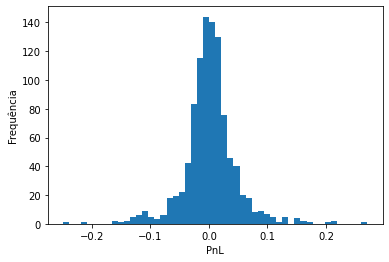

In [7]:
# Histograma da amostra de 1000 dias
plt.hist(amostra_PnL, density=False, bins=50)
plt.ylabel('Frequência')
plt.xlabel('PnL');

Text(0.5, 1.0, 'Histograma')

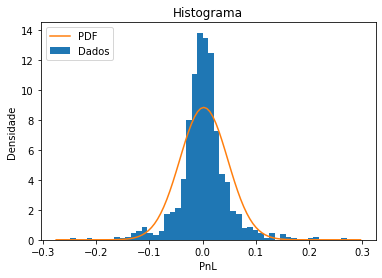

In [8]:
import scipy.stats as st
bins = 50
plt.hist(amostra_PnL, density=True, bins=bins, label="Dados")
xmin, xmax = plt.xlim()
mu, sigma = st.norm.fit(amostra_PnL)
x = np.linspace(xmin, xmax, 100)
curve = st.norm.pdf(x, mu, sigma)
plt.plot(x, curve, label="PDF")
plt.legend(loc="upper left")
plt.ylabel('Densidade')
plt.xlabel('PnL')
plt.title("Histograma")

Para obter o VaR, basta buscar o percentil desejado $\alpha$:

In [9]:
alpha = 0.01
var = amostra_PnL.quantile(alpha)
print("VaR 99% = R$ " + "{:.2f}".format(- var))

VaR 99% = R$ 0.13


Para obter o ES, basta calcular a média dos valores abaixo do VaR:

In [10]:
amostra_es = amostra_PnL[amostra_PnL <= var]
amostra_es

date
2020-03-13   -0.14705
2020-04-09   -0.13440
2020-04-29   -0.13920
2020-06-03   -0.20850
2020-07-21   -0.13520
2020-11-05   -0.13080
2020-11-09   -0.24920
2021-01-13   -0.15670
2021-03-04   -0.13340
2021-03-11   -0.15590
Name: PnL, dtype: float64

In [12]:
es = amostra_PnL[amostra_PnL <= var].mean()
print("ES 99% = R$ " + "{:.2f}".format(-es))

ES 99% = R$ 0.16


### 5. Exercícios<a class="anchor" id="5"></a>

1. É possível o ES apresentar um valor menor (em módulo) que o VaR:   
a) sob o mesmo nível de confiança?   
b) sob um nível de confiança maior (ex: ES 95% e VaR 99%)?   
c) sob um nível de confiança menor (ex: ES 99% e VaR 95%)?

Resposta aqui

2. Calcule o VaR histórico com nível de confiança de 95% e HP=1, para a última data disponível de USD Spot (30/04/2021), utilizando uma amostra de 500 dias.

In [32]:
# Resposta aqui 

3. Calcule o ES histórico com nível de confiança de 97,5% e HP=1, para a última data disponível de USD Spot (30/04/2021), utilizando uma amostra de 1000 dias.

In [ ]:
# Resposta aqui

4. Calcule a série temporal de VaR 99% e 97,5%, com HP=1, utilizando uma amostra de 1000 dias para todas as datas possíveis.   
Dica: Há 2844 dias com preços na base, removendo HP=1 para cálculo do primeiro retorno e 1000 para amostra do 1º VaR, teremos como resultado uma série de VaRs de tamanho 1843.

In [9]:
# Resposta aqui

### 6. Referências bibliográficas<a class="anchor" id="6"></a>

Didáticos:   
- [Pedro A. Moretin, Econometria financeira: um curso em séries temporais financeiras](https://books.google.com.br/books/about/Econometria_financeira.html?id=I3i5DwAAQBAJ&source=kp_book_description&redir_esc=y)
- [Philippe Jorion, Value at Risk](https://merage.uci.edu/~jorion/VAR/)

Normas de reguladores:
- [BCB, 2017, Resolução 4.557](https://www.bcb.gov.br/pre/normativos/busca/downloadNormativo.asp?arquivo=/Lists/Normativos/Attachments/50344/Res_4557_v2_L.pdf)
- [BCB, 2013, Circular 3.646](https://www.bcb.gov.br/htms/Normativ/CIRCULAR3646.pdf)
- [BCB, 2018, Circular 3.876](https://www.bcb.gov.br/estabilidadefinanceira/exibenormativo?tipo=Circular&numero=3876)
- [BIS, 2019, Minimum capital requirements for market risk (FRTB)](https://www.bis.org/bcbs/publ/d457.pdf)